# Trash Glob

The goal here is to demostrate a mechanism for automatically creating globs of trash that are along reasonable contrast boundaries from the trash images.  We can then automatically extract these as transparent background images and overlay them randomly on the landscape images.  This will form our training data augmentation pipeline.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load an image

In [2]:
img = cv2.imread('../data/trash/00ae9af1-63f6-43ad-96fb-83252fe6a8c1.jpg')

### Just display it for starters

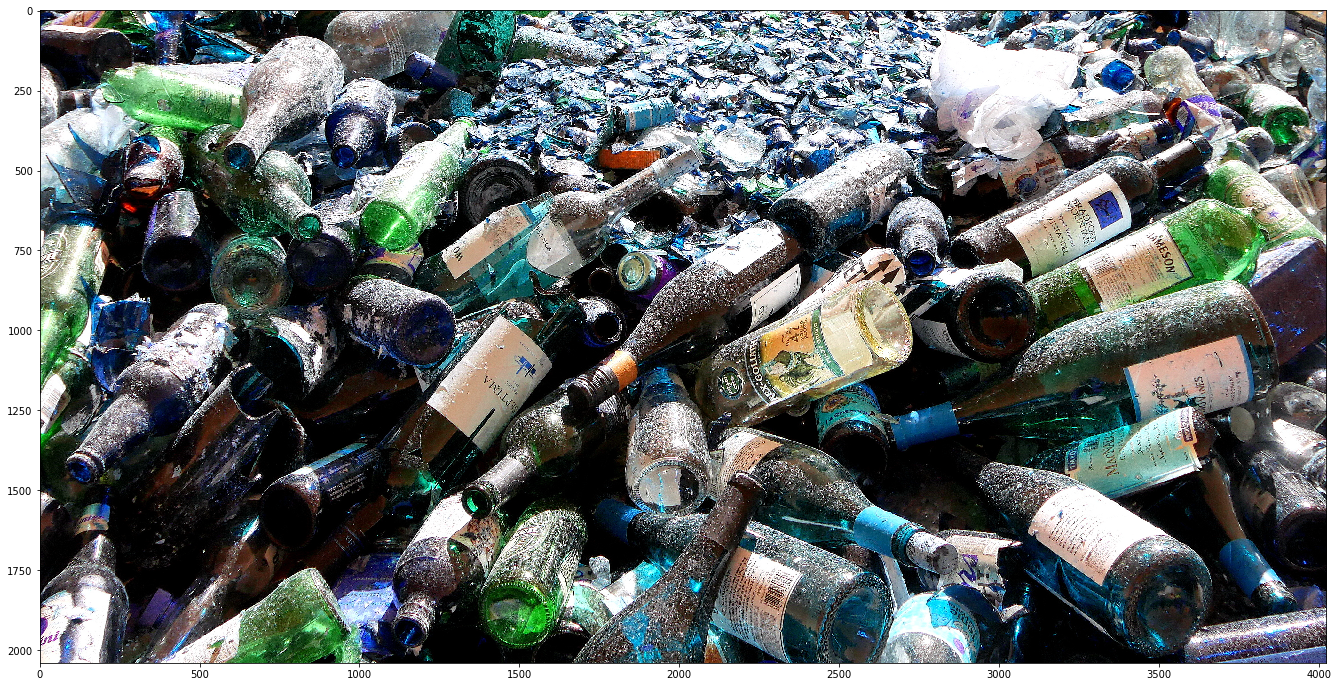

In [3]:
plt.figure(figsize=(26,12))
plt.imshow(img)

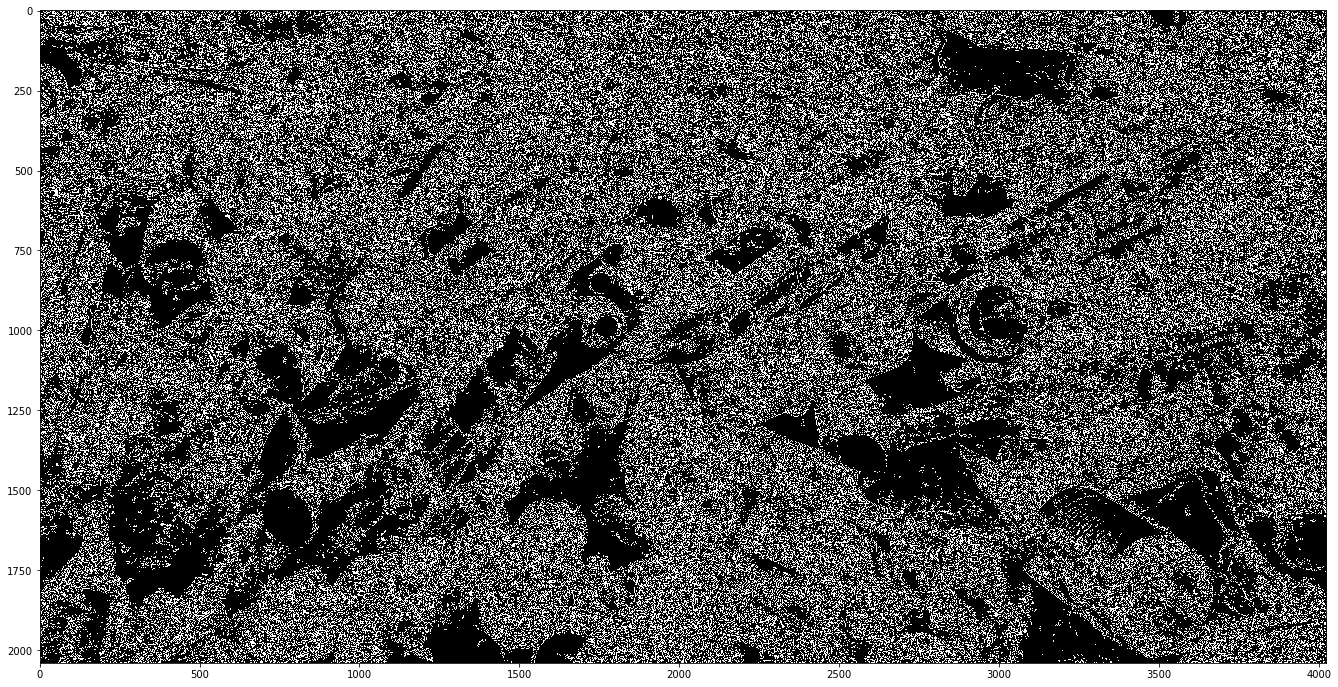

In [4]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.bilateralFilter(gray, 15, 55, 55)
#edged = cv2.Canny(gray, 100, 101, 7)

sigma = 0.33

v = np.median(img)
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(img, lower, upper)

plt.figure(figsize=(26,12))
plt.imshow(edged, cmap='gray')

In [ ]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
print(cnts)